In [0]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
data_train=pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/train_LZdllcl.csv")
data_test=pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/test_2umaH9m.csv")
#print(data_train.shape,data_test.shape)
print("Number of data points in train data", data_train.shape)
print('-'*50)
print("The attributes of data :", data_train.columns.values)

Number of data points in train data (54808, 14)
--------------------------------------------------
The attributes of data : ['employee_id' 'department' 'region' 'education' 'gender'
 'recruitment_channel' 'no_of_trainings' 'age' 'previous_year_rating'
 'length_of_service' 'KPIs_met >80%' 'awards_won?' 'avg_training_score'
 'is_promoted']


In [4]:
print("Number of data points in train data", data_test.shape)
print('-'*50)
print("The attributes of data :", data_test.columns.values)

Number of data points in train data (23490, 13)
--------------------------------------------------
The attributes of data : ['employee_id' 'department' 'region' 'education' 'gender'
 'recruitment_channel' 'no_of_trainings' 'age' 'previous_year_rating'
 'length_of_service' 'KPIs_met >80%' 'awards_won?' 'avg_training_score']


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [7]:
data_train.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0


**handling null values in train data**

In [8]:
data_train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [9]:
data_train["education"].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [0]:
#replace  "nan" with Bachelor's
data_train["education"] = data_train["education"].replace(np.nan, "Bachelor's")

In [0]:
#data_train["education"].value_counts()

In [12]:
data_train["previous_year_rating"].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [0]:
data_train["previous_year_rating"] = data_train["previous_year_rating"].replace(np.nan, 3.0)

In [0]:
#data_train["previous_year_rating"].value_counts()

In [15]:
data_train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

**handling null values in test data**

In [0]:
#data_test.isnull().sum()

In [0]:
data_test["education"] = data_test["education"].replace(np.nan, "Bachelor's")
data_test["previous_year_rating"] = data_test["previous_year_rating"].replace(np.nan, 3.0)

In [18]:
data_test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

**data exploration**

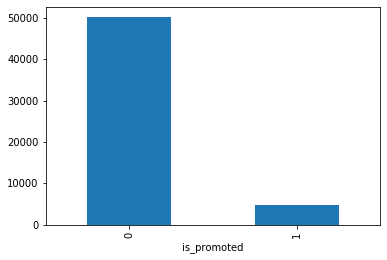

In [19]:
data_train.groupby("is_promoted")['employee_id'].count().plot.bar()

In [20]:
data_train["is_promoted"].value_counts('0')

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

so here we can say that this is imbalance data set . 91.5% peple are not promote only 8.5% peple are promoted

In [21]:
data_train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.304481,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.214770,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


here some importent info like <br>
1:no_of_trainings min 1 and max 10.<br>
2:avg_training_score	maximum is 99% <br>
3:length_of_service maximum is 37 years and minimum 1<br>
and so on

<h2><b>categorical data</b></h2>

In [0]:
cat_col=data_train.dtypes[data_train.dtypes == 'object']
num_col=data_train.dtypes[data_train.dtypes != "object"]

In [23]:
cat_col

department             object
region                 object
education              object
gender                 object
recruitment_channel    object
dtype: object

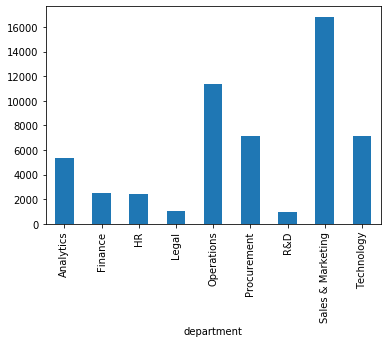

In [24]:
data_train.groupby("department")['employee_id'].count().plot.bar()

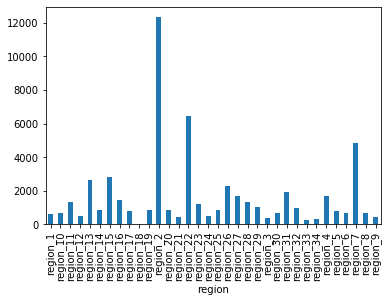

In [25]:
data_train.groupby("region")['employee_id'].count().plot.bar()

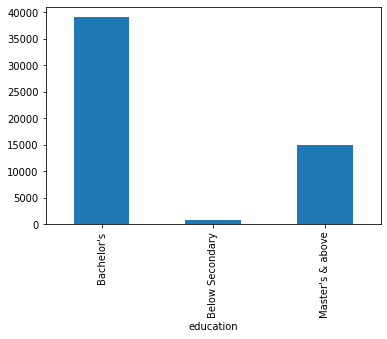

In [26]:
data_train.groupby("education")['employee_id'].count().plot.bar()

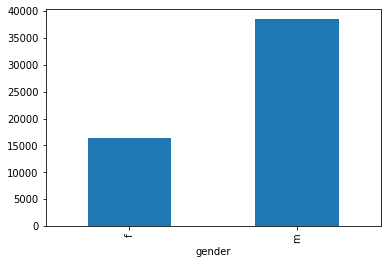

In [27]:
data_train.groupby("gender")['employee_id'].count().plot.bar()

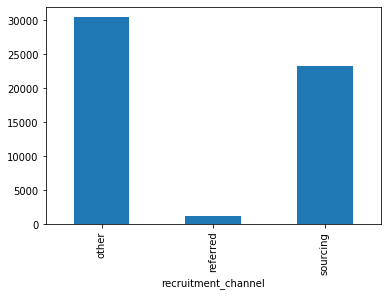

In [28]:
data_train.groupby("recruitment_channel")['employee_id'].count().plot.bar()

**numarical data**

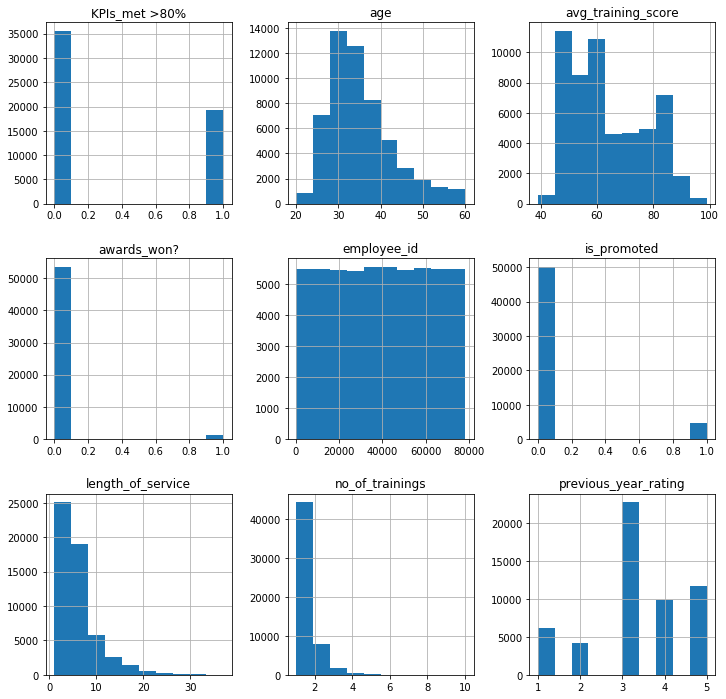

In [29]:
data_train[list(num_col.index)].hist(figsize = (12,12));

1:only half of the employe have kpi more then 80% where minimum kpi is 0 and max in 1 .<br>
2:so avg age is in between 25 to 45 year.<br>
3:avg rateing is in betweev 45 to 85 .<br>
4:only few of them is awards winers.<br>
5:length of service is in between 1 to 10 or max 35.<br>
6:no of training is 2 or 3 .<br>
7:and previous year traing is max 3 .<br>

<h2><b>bivariant analysis

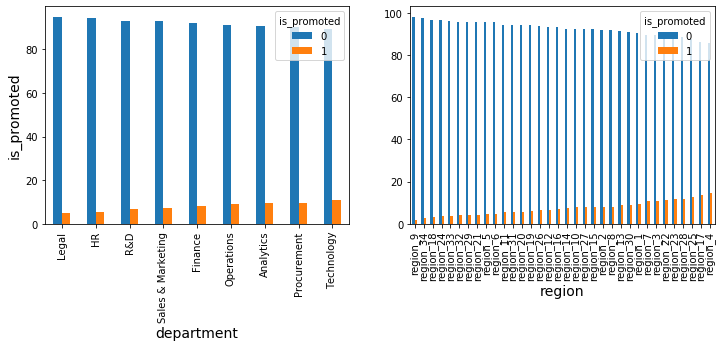

In [30]:
table_depar= pd.crosstab(data_train['department'], data_train['is_promoted'])
table_regin=pd.crosstab(data_train["region"],data_train["is_promoted"])
table_edu=pd.crosstab(data_train["education"],data_train["is_promoted"])
table_gender=pd.crosstab(data_train["gender"],data_train["is_promoted"])
table_recru=pd.crosstab(data_train["recruitment_channel"],data_train["is_promoted"])

fig = plt.figure(figsize = (12,4))
ax = fig.add_subplot(1,2,1)
(table_depar.div(table_depar.sum(axis= 1),axis = 0)*100).sort_values(by= 1).plot(kind = 'bar',ax=ax);
plt.xlabel("department",fontsize = 14);
plt.ylabel('is_promoted',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_regin.div(table_regin.sum(axis = 1),axis = 0)*100).sort_values(by =1).plot(kind = 'bar',ax=ax);
plt.xlabel("region",fontsize = 14);

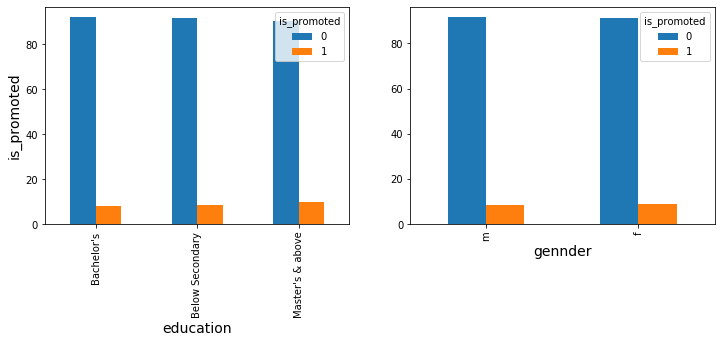

In [31]:
fig = plt.figure(figsize = (12,4))
ax = fig.add_subplot(1,2,1)
(table_edu.div(table_edu.sum(axis= 1),axis = 0)*100).sort_values(by= 1).plot(kind = 'bar',ax=ax);
plt.xlabel("education",fontsize = 14);
plt.ylabel('is_promoted',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_gender.div(table_gender.sum(axis = 1),axis = 0)*100).sort_values(by =1).plot(kind = 'bar',ax=ax);
plt.xlabel("gennder",fontsize = 14);

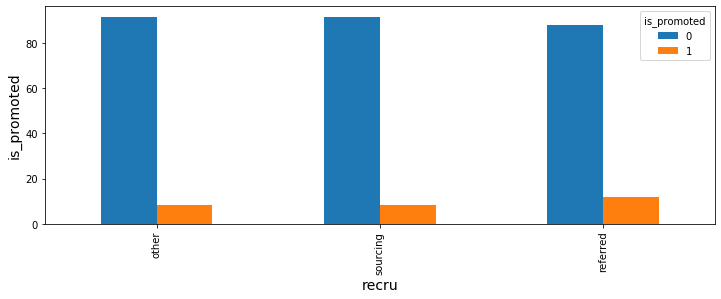

In [32]:
fig = plt.figure(figsize = (12,4))
ax = fig.add_subplot(1,1,1)
(table_recru.div(table_recru.sum(axis= 1),axis = 0)*100).sort_values(by= 1).plot(kind = 'bar',ax=ax);
plt.xlabel("recru",fontsize = 14);
plt.ylabel('is_promoted',fontsize = 14);

**Let's find correlation between numerical fetatures**

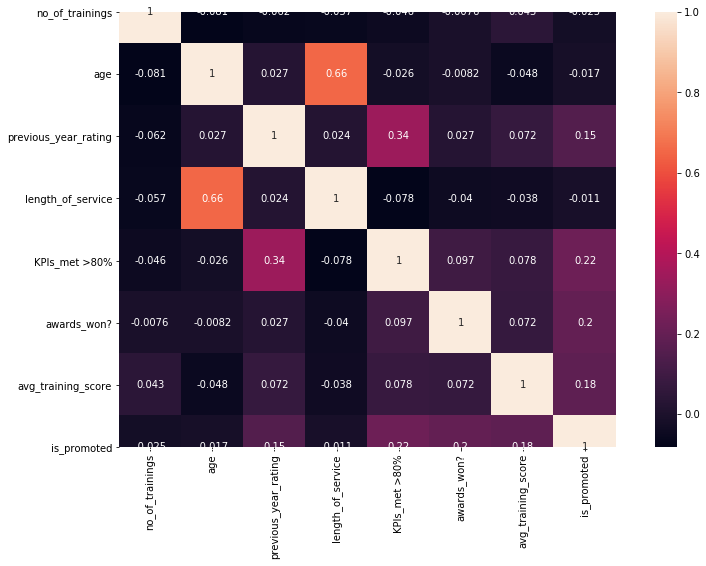

In [33]:
fig = plt.figure(figsize = (14,8))

sns.heatmap(data_train[list(num_col.index[1:])].corr(),annot = True,square = True);

#### strong correlation<br>
1:age and lenght_of_service<br>
2:KPI and previous year rating<br>


<h3>preprocess the train and test data<h3>

In [0]:
targets = data_train["is_promoted"]

**combine the train and test data**

In [0]:
data_train.drop('is_promoted',1,inplace=True)
train_test_data = data_train.append(data_test)
train_test_data.reset_index(inplace=True)

In [36]:
train_test_data.head(2)

,index,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60


In [0]:
train_test_data.drop(['index', 'employee_id'], inplace=True, axis=1)

In [0]:
#train_test_data.isnull().sum()

 **data preprocessing**

In [39]:
train_test_data["department"].value_counts()

Sales & Marketing    24155
Operations           16112
Procurement          10158
Technology           10149
Analytics             7671
Finance               3627
HR                    3503
Legal                 1484
R&D                   1439
Name: department, dtype: int64

here we change into small letter and only alphabets except '_' 

**department**

In [0]:
import re

In [0]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"Sales & Marketing", "sales_marketing", phrase)
    phrase = re.sub(r"R&D", "R_D", phrase)
    # general
   
    return phrase

In [42]:
sent = decontracted(train_test_data['department'].values[0])
print(sent)
print("="*50)

sales_marketing


In [43]:
from tqdm import tqdm
preprocessed_department = []
# tqdm is for printing the status bar
for sentance in tqdm(train_test_data["department"].values):
    sent = decontracted(sentance)
    #sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    preprocessed_department.append(sent.lower().strip())

100%|██████████| 78298/78298 [00:00<00:00, 355491.97it/s]


In [0]:
train_test_data["preprocessed_department"]=preprocessed_department
train_test_data.drop(['department'], axis=1, inplace=True)

In [45]:
train_test_data["preprocessed_department"].value_counts()

sales_marketing    24155
operations         16112
procurement        10158
technology         10149
analytics           7671
finance             3627
hr                  3503
legal               1484
r_d                 1439
Name: preprocessed_department, dtype: int64

**education** 

In [46]:
data_train["education"].value_counts()

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [0]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"Master's & above", "masters_above", phrase)
    phrase = re.sub(r"Bachelor's", "Bachelors", phrase)
    phrase = re.sub(r"Below Secondary", "Below_Secondary", phrase)
    # general
   
    return phrase

In [48]:
sent = decontracted(train_test_data['education'].values[0])
print(sent)
print("="*50)

masters_above


In [49]:
from tqdm import tqdm
preprocessed_education = []
# tqdm is for printing the status bar
for sentance in tqdm(train_test_data["education"].values):
    sent = decontracted(sentance)
    #sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    preprocessed_education.append(sent.lower().strip())

100%|██████████| 78298/78298 [00:00<00:00, 285962.99it/s]


In [0]:
train_test_data["preprocessed_education"]=preprocessed_education
train_test_data.drop(['education'], axis=1, inplace=True)

In [51]:
train_test_data.head()

,region,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,preprocessed_department,preprocessed_education
0,region_7,f,sourcing,1,35,5.0,8,1,0,49,sales_marketing,masters_above
1,region_22,m,other,1,30,5.0,4,0,0,60,operations,bachelors
2,region_19,m,sourcing,1,34,3.0,7,0,0,50,sales_marketing,bachelors
3,region_23,m,other,2,39,1.0,10,0,0,50,sales_marketing,bachelors
4,region_26,m,other,1,45,3.0,2,0,0,73,technology,bachelors


In [0]:
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import StandardScaler

In [0]:
num_col_new = ['no_of_trainings','age', 'previous_year_rating',
       'length_of_service','KPIs_met >80%','awards_won?','avg_training_score']

In [54]:
scaler = MinMaxScaler()
pd.DataFrame(scaler.fit_transform(train_test_data[num_col_new]),columns = num_col_new).head(3)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0.0,0.375,1.0,0.194444,1.0,0.0,0.166667
1,0.0,0.250,1.0,0.083333,0.0,0.0,0.350000
2,0.0,0.350,0.5,0.166667,0.0,0.0,0.183333


In [0]:
class DataFrameSelector(TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
                
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        return X[self.attribute_names]
    
    
class num_trans(TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        df = pd.DataFrame(X)
        df.columns = num_col_new 
        return df
        
    
    
pipeline = Pipeline([('selector',DataFrameSelector(num_col_new)),  
                     ('scaler',MinMaxScaler()),
                    ('transform',num_trans())])

In [56]:
num_df = pipeline.fit_transform(train_test_data)
num_df.shape

(78298, 7)

In [57]:
cat_col_new=train_test_data.dtypes[train_test_data.dtypes == "object"]
cat_col

department             object
region                 object
education              object
gender                 object
recruitment_channel    object
dtype: object

In [0]:
cat_col_new=['region','gender','recruitment_channel','preprocessed_department','preprocessed_education']
cols=['region','gender','recruitment_channel','preprocessed_department','preprocessed_education']


In [0]:
class dummies(TransformerMixin):
    def __init__(self,cols):
        self.cols = cols
    
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        df = pd.get_dummies(X)
        df_new = df[df.columns.difference(cols)] 
#difference returns the original columns, with the columns passed as argument removed.
        return df_new

In [0]:
pipeline_cat=Pipeline([('selector',DataFrameSelector(cat_col_new)),
                      ('dummies',dummies(cols))])

In [61]:
cat_df = pipeline_cat.fit_transform(train_test_data)
cat_df.shape

(78298, 51)

In [62]:
cat_df.head()

,gender_f,gender_m,preprocessed_department_analytics,preprocessed_department_finance,preprocessed_department_hr,preprocessed_department_legal,preprocessed_department_operations,preprocessed_department_procurement,preprocessed_department_r_d,preprocessed_department_sales_marketing,preprocessed_department_technology,preprocessed_education_bachelors,preprocessed_education_below_secondary,preprocessed_education_masters_above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9
0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
cat_df['id'] = pd.Series(range(cat_df.shape[0]))
num_df['id'] = pd.Series(range(num_df.shape[0]))

In [64]:
final_train_test_data = pd.merge(cat_df,num_df,how = 'inner', on = 'id')
print(f"Number of observations in final dataset: {final_train_test_data.shape}")

Number of observations in final dataset: (78298, 59)


**split the data into train and test**

In [0]:
final_Train=final_train_test_data.iloc[:54808,:]
final_Test=final_train_test_data.iloc[54808:,:]

In [66]:
final_Train.shape

(54808, 59)

In [67]:
targets.shape

(54808,)

In [68]:
final_Test.shape

(23490, 59)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [0]:
X_train,X_test, y_train, y_test = train_test_split(final_Train, targets, stratify=targets, test_size=0.2)

In [80]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(43846, 59)
(10962, 59)
(43846,)
(10962,)


In [0]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV

In [131]:
param_test = {
 "n_estimators": [1,5,10,50,100,500],
     "max_depth":[10,20,50,80,100,150,200,250]
}
clf=xgb.XGBClassifier()

rms = RandomizedSearchCV(clf,param_test,scoring = 'roc_auc')
rms.fit(X_train, y_train)

print(rms.best_score_)
print(rms.best_estimator_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9032117398723588
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [132]:
clf = xgb.XGBClassifier(n_estimators=rms.best_params_['n_estimators'], criterion='gini', max_depth=rms.best_params_['max_depth'], random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)
calibrated= CalibratedClassifierCV(clf, method="sigmoid")
calibrated.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=1,
                                                    criterion='gini', gamma=0,
                                                    learning_rate=0.1,
                                                    max_delta_step=0,
                                                    max_depth=10,
                                                    min_child_weight=1,
                                                    missing=None,
                                                    n_estimators=100, n_jobs=-1,
                                                    nthread=None,
                                                    objective='binary:logi

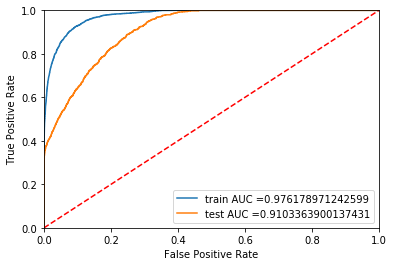

In [136]:
#https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

train_fpr, train_tpr, thresholds = roc_curve(y_train, calibrated.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, calibrated.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc=4)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [0]:
from sklearn.metrics import confusion_matrix

In [139]:
print("Train confusion matrix")
cm_train=confusion_matrix(y_train, calibrated.predict(X_train))
cm_test=confusion_matrix(y_test, calibrated.predict(X_test))
print(cm_train)
print("Test confusion matrix")
print(cm_test)


Train confusion matrix
[[40081    31]
 [ 2085  1649]]
Test confusion matrix
[[9987   41]
 [ 594  340]]


In [0]:
pred4=calibrated.predict(final_Test)

In [0]:
df_output = pd.DataFrame()
aux = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/test_2umaH9m.csv')
df_output['employee_id'] = aux['employee_id']
df_output['is_promoted'] =pred4
df_output[['employee_id','is_promoted']].to_csv('/content/drive/My Drive/Colab Notebooks/data/output8.csv',index=False)

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu',input_dim = 59))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 25, init = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'he_uniform'))

# Compiling the ANN
classifier.compile(loss=root_mean_squared_error, optimizer='Adamax')

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, nb_epoch = 1000)